## Carga de datos

In [1]:
import pandas as pd                                       # Import por defecto trabajando con datos
import numpy as np                                         # Import por defecto trabajando con datos

In [2]:
dataset = pd.read_csv('dataset.csv')

## Preparación de los datos - Preprocesamiento

Ya conocemos la estructura de nuestros datos, ahora toca currarselo y prepararlos para el modelo. Esta parte es muy importante, aunque consigamos encontrar la arquitectura perfecta para la tarea a resolver, si los datos de entrenamiento no están bien, el modelo no va a aprender.

1. Data Cleaning: localización y correción errores o discrepancias en los datos
2. Data Integration: fusión de información extraída de múltiples fuentes para delinear y crear un conjunto de datos único
3. Data Transformation: normalización, estandarización, discretización..
4. Data Reduction: si el tamaño del dataset es muy grande, hay que reducir el tamaño del conjunto de datos manteniendo información crucial.
5. Identificar y manejar los valores faltantes.
6. Manejar outliers: Z-score o IQR
7. Splitting the dataset en 3 conjuntos: entrenamiento (70), test(20) y validación (10)

#### Data Cleaning y Data Integration
Al descargar datasets de Kaggle, nos podemos ahorrar esta parte muchas veces, pero este proceso involucraría revisar los resumenes del df con .describe o .info, o incluso manualmente con scripts, para encontrar discrepancias en los datos.

#### Data Transformation

Debemos normalizar y estandarizar nuestros datos, sirviendo los de tipo numérico por simplicidad para este ejempplo. Para ello es especialmente útil la librería sklearn: **MinMaxScaler** normaliza,se encarga de que los valores de las características estén en el rango [0,1]; y **StandardScaler** se encarga normalizar, es decir ajustar los valores de las características para que tengan una media de 0 y una desviación estándar de 1


In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
df = dataset.select_dtypes(include='number')

In [5]:

normalizer  = MinMaxScaler()
standarizer = StandardScaler()
normal_     = normalizer.fit_transform(df)
standard_   = standarizer.fit_transform(normal_)
dataset     = pd.DataFrame(standard_, columns=df.columns)
dataset.reset_index(drop=True)
dataset


,price,area,bedrooms,bathrooms,stories,parking
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692
...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,1.517692
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-0.805741
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-0.805741


#### Data Cleaning y Data Integration
Al descargar datasets de Kaggle, nos podemos ahorrar esta parte muchas veces, pero este proceso involucraría revisar los resumenes del df con .describe o .info, o incluso manualmente con scripts, para encontrar discrepancias en los datos.

#### Detectar Outliers
Queremos detectar valores atípicos. Valores que no encajen ni con cola, que sean incoherentes con el resto, o muy raros. Para casos sencillos (y no tan sencillos), visualizar los datos es la primera opción. Para ello te recomiendo familiarizarte con matplotlib y seaborn


/home/jd/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jd/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jd/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jd/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

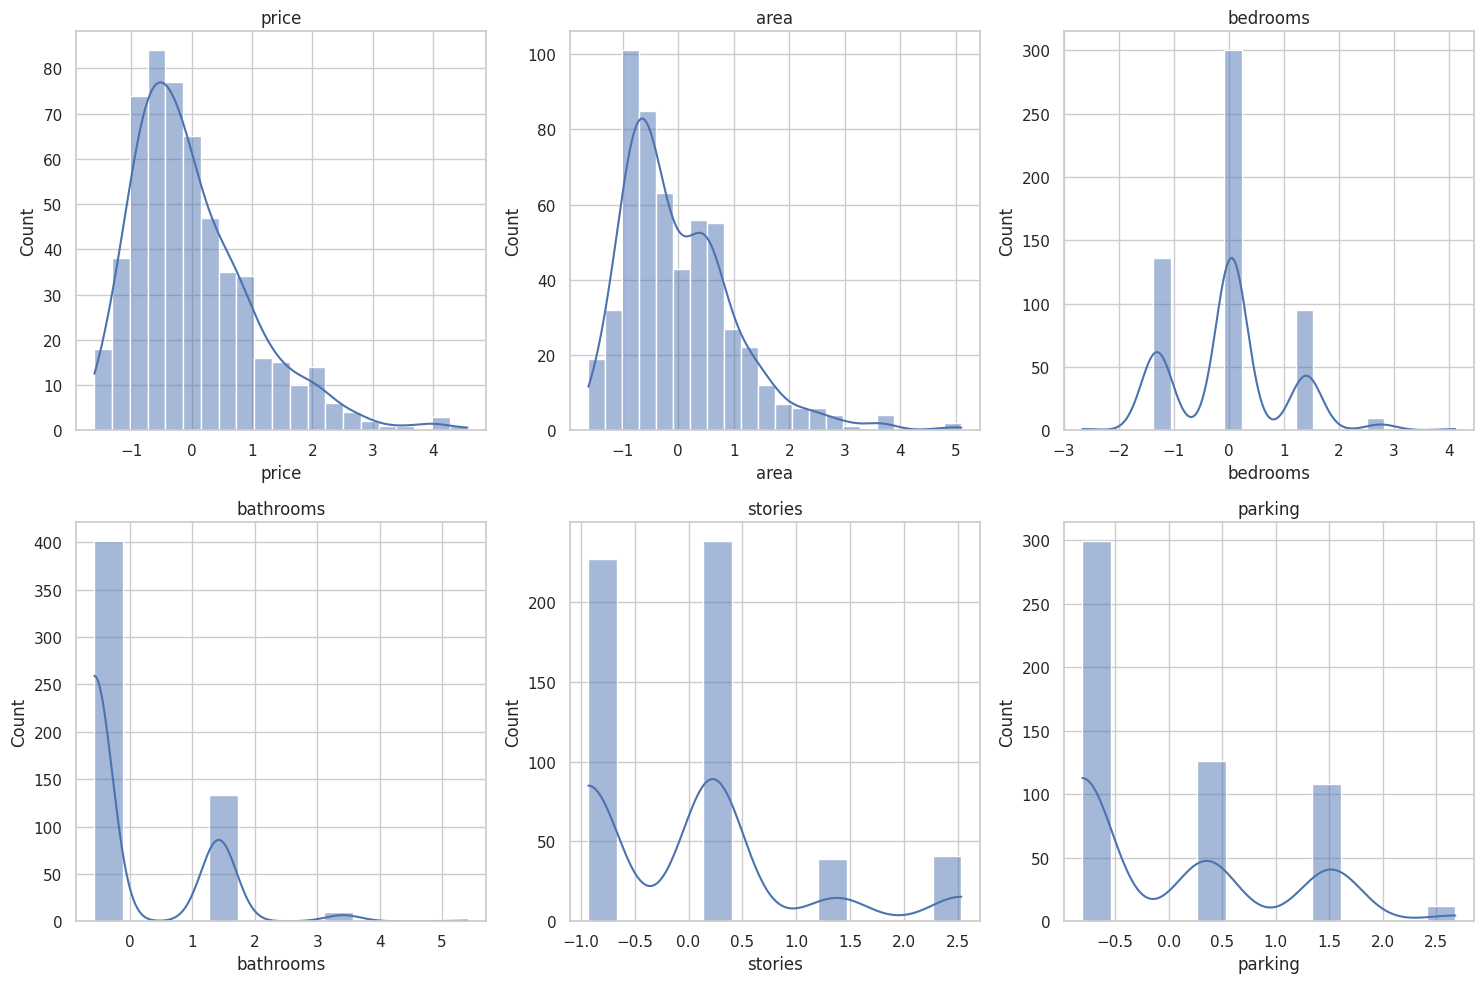

In [6]:
import matplotlib.pyplot as plt                                  # Imports por defecto para plots
import seaborn as sns                                            # Imports por defecto para plots


sns.set(style="whitegrid")                                       # Configurar el estilo de los gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 10))                  # Crear subplots


num_cols = min(len(dataset.columns), 6)                           
for i, col in enumerate(dataset.columns[:num_cols]):             # Recorremos columnas
    sns.histplot(dataset[col], ax=axs[i//3, i%3], kde=True)      # Crear histogramas para cada columna
    axs[i//3, i%3].set_title(col)


plt.tight_layout()                                               # Ajustar diseño
plt.show()                                                       # Plotear

Más allá del precio desorbitado de alguna mansión de lujo con valor desorbitado, no parece haber datos atípicos.

#### Separar los conjuntos
Debemos dividir el dataset en 3: entrenamiento, test, y validación. Nuevamente la solución más estándar es recurrir a sklearn. 

In [7]:
from sklearn.model_selection import train_test_split

Seteamos un random_state, por que de no hacerlo, si volvemos a ejecutar el codigo separa los registros de forma distinta.

In [8]:
temporal_df, test_df = train_test_split(dataset, test_size=0.3, random_state=42)        # Dividir el conjunto en entrenamiento (70%) y temporal (30%)
train_df, val_df = train_test_split(temporal_df, test_size=0.33, random_state=42)       # Dividir el conjunto temporal en prueba (20%) y validación (10%)
train_df

,price,area,bedrooms,bathrooms,stories,parking
156,0.404699,0.806890,0.047278,-0.570187,-0.929397,-0.805741
150,0.445904,-0.006707,0.047278,-0.570187,0.224410,-0.805741
317,-0.378188,-0.073123,0.047278,1.421812,0.224410,1.517692
282,-0.265812,-1.372388,0.047278,-0.570187,0.224410,-0.805741
122,0.633198,0.508940,1.403419,1.421812,-0.929397,0.355976
...,...,...,...,...,...,...
141,0.473998,0.696197,1.403419,1.421812,0.224410,0.355976
334,-0.453106,-0.858124,-1.308863,-0.570187,-0.929397,0.355976
128,0.591993,0.161178,0.047278,-0.570187,1.378217,0.355976
243,-0.115977,-1.199429,0.047278,-0.570187,0.224410,-0.805741


#### Guardamos los conjuntos preprocesados

In [9]:
# train_df.to_csv('train.csv')
# test_df.to_csv('test.csv')
# val_df.to_csv('val.csv')

# Ahora, ¿Cómo funciona realmente el Machine Learning? 
El primer paso es seleccionar una arquitectura de modelo adecuada que pueda abordar el problema en cuestión, que no es tarea sencilla. Una vez establecida esta arquitectura, procedemos a entrenar el modelo utilizando el conjunto de datos de entrenamiento. 

El proceso de entrenamiento se caracteriza por una reducción iterativa de una métrica conocida como 'valor de pérdida'. El modelo recibe un conjunto de entradas que representan las características de un registro concreto. Estas entradas se procesan secuencialmente a través de las capas del modelo, acabando en una predicción. A continuación, la predicción se compara con el valor real, y esta comparación da lugar a una estimación de la pérdida, que mide cuán lejos estuvo la predicción del valor real.

Basándose en esta pérdida, el modelo ajusta internamente los pesos de sus capas, con el objetivo de mejorar las predicciones en futuras iteraciones. Lo vemos en más profundidad en el próximo tutorial, ¡espero que os haya gustado y hayáis aprendido algo nuevo!
